# TP 2 - Vision por computadora - Niels Pacheco a1622

Objetivo:
- Implementar un detector de máximo enfoque sobre un video aplicando técnicas de análisis espectral similar al que utilizan las cámaras digitales modernas. El video a procesar será: “focus_video.mov”.


### 1. Se debe implementar un algoritmo que dada una imagen, o región, calcule la métrica propuesta en el paper "Image Sharpness Measure for Blurred Images in Frequency Domain“ y realizar tres experimentos:
  a) Medición sobre todo el frame.
  b) Medición sobre una ROI ubicada en el centro del frame. Area de la ROI = 5 o 10% del area total del frame.
  c) Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores arbitrarios, probar con varios valores 3x3, 7x5, etc … (al menos 3).

Para cada experimento se debe presentar :
- Una curva o varias curvas que muestren la evolución de la métrica frame a frame donde se vea claramente cuando el algoritmo detecto el punto
de máximo enfoque.
- Video con la ROI o matriz, graficada en rojo y superpuesta al video original para los frames que no están en foco y verde para los frames
donde se detecta la condición de máximo enfoque.



### A) Medición sobre todo el frame

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

video_path = '/content/focus_video.mov'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error al abrir el archivo de video")


In [ ]:
# Lista para almacenar la métrica de nitidez de cada frame
sharpness_metrics = []

# Obtener el número total de frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))


In [ ]:
frame_number = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convertir el frame a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Obtener las dimensiones del frame
    rows, cols = gray.shape
    crow, ccol = rows // 2 , cols // 2  # Coordenadas del centro

    # Aplicar la Transformada de Fourier 2D
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)

    # Crear una máscara para las frecuencias altas
    # Definir un radio para las frecuencias bajas
    radius = 20

    # Crear una máscara circular que bloquee las frecuencias bajas
    mask = np.ones((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 0, thickness=-1)

    # Aplicar la máscara al espectro de magnitud
    high_freq_mag = magnitude_spectrum * mask

    # Calcular la métrica de nitidez como la suma de las magnitudes de las frecuencias altas
    sharpness = np.sum(high_freq_mag)

    # Opcional: Normalizar por la energía total
    total_energy = np.sum(magnitude_spectrum)
    sharpness_metric = sharpness / total_energy

    # Almacenar la métrica de nitidez
    sharpness_metrics.append(sharpness_metric)

    frame_number += 1

    # Mostrar el progreso cada 10 frames
    if frame_number % 10 == 0:
        print(f"Procesando frame {frame_number}/{total_frames}")

# Liberar el objeto VideoCapture
cap.release()


Procesando frame 10/171
Procesando frame 20/171
Procesando frame 30/171
Procesando frame 40/171
Procesando frame 50/171
Procesando frame 60/171
Procesando frame 70/171
Procesando frame 80/171
Procesando frame 90/171
Procesando frame 100/171
Procesando frame 110/171
Procesando frame 120/171
Procesando frame 130/171
Procesando frame 140/171
Procesando frame 150/171
Procesando frame 160/171
Procesando frame 170/171


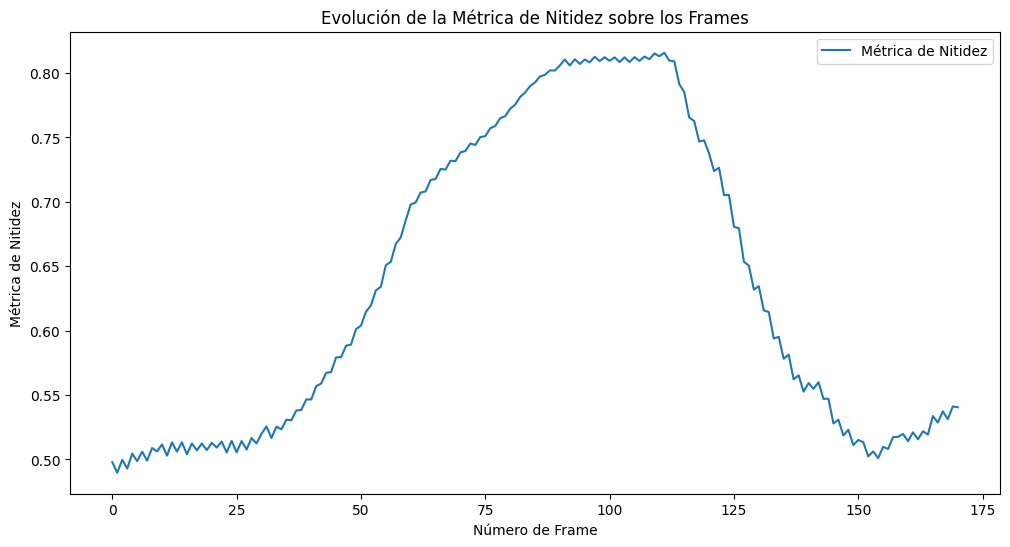

In [ ]:
# Crear una figura
plt.figure(figsize=(12, 6))

# Graficar la métrica de nitidez
plt.plot(sharpness_metrics, label='Métrica de Nitidez')

# Añadir título y etiquetas
plt.title('Evolución de la Métrica de Nitidez sobre los Frames')
plt.xlabel('Número de Frame')
plt.ylabel('Métrica de Nitidez')

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [ ]:
# Encontrar el índice (frame) con la máxima métrica de nitidez
max_sharpness = max(sharpness_metrics)
max_sharpness_frame = sharpness_metrics.index(max_sharpness)

print(f"El frame con máximo enfoque es el número: {max_sharpness_frame}")


El frame con máximo enfoque es el número: 111


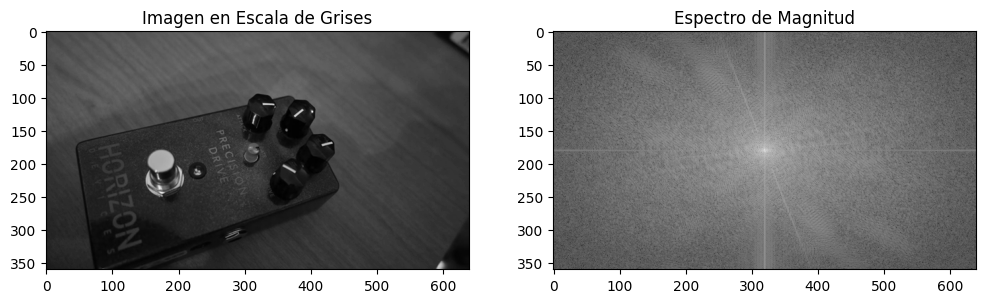

In [ ]:
# Seleccionar un frame específico
frame_index = max_sharpness_frame

# Leer el frame correspondiente
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, frame = cap.read()
cap.release()

# Convertir a escala de grises y calcular el espectro
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Graficar la imagen y su espectro
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Espectro de Magnitud')
plt.show()


Ahora: Video con la ROI o matriz, graficada en rojo y superpuesta al video original para los frames que no están en foco y verde para los frames donde se detecta la condición de máximo enfoque.

In [ ]:
# Obtener propiedades del video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Definir el codec y crear el objeto VideoWriter
output_path = '/content/output_video_a.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))


In [ ]:
# Reiniciar el índice del frame
frame_number = 0

# Reiniciar el VideoCapture
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Determinar el color de la ROI
    if frame_number == max_sharpness_frame:
        color = (0, 255, 0)  # Verde para el frame con máximo enfoque
    else:
        color = (0, 0, 255)  # Rojo para los demás frames


    # En este caso, simplemente dibujamos un rectángulo alrededor del frame
    cv2.rectangle(frame, (0, 0), (width-1, height-1), color, 5)

    # Escribir el frame en el video de salida
    out.write(frame)

    frame_number += 1

    # Mostrar el progreso cada 10 frames
    if frame_number % 10 == 0:
        print(f"Escribiendo frame {frame_number}")

# Liberar los objetos
cap.release()
out.release()

print("Video de salida generado correctamente.")

Video de salida generado correctamente.


In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width=600):
    # Abrir el archivo de video y leerlo en modo binario
    video_file = open(video_path, 'rb').read()

    # Codificar el archivo en base64
    video_url = f"data:video/avi;base64,{b64encode(video_file).decode()}"

    # Mostrar el video incrustado en HTML con controles
    return HTML(f"""<video width={video_width} controls>
                        <source src="{video_url}" type="video/avi">
                    </video>""")

# Reproduce el video
show_video('/content/output_video_a.avi')


Si no se puede visualizar el video, también aqui esta el link de google drive para que pueda ser visualizado:

https://drive.google.com/file/d/1ni6w2pkPY_jlpuwcg5Q1sWIjjYQCVB96/view?usp=sharing

En el experimento 1a, implementamos una métrica de enfoque sobre todo el frame utilizando la Transformada de Fourier 2D. A cada frame del video se le aplicó esta transformada para obtener el espectro de magnitud, con el que luego se evaluaron los componentes de alta frecuencia, que representan las áreas nítidas de la imagen. La métrica se calculó como la suma de las magnitudes de estas frecuencias altas, y se graficó la evolución de la nitidez a lo largo de los 171 frames del video. El punto de máximo enfoque se identificó en el frame número 111, donde la métrica de nitidez alcanzó su valor máximo, indicando la mayor claridad.

### b) Medición sobre una ROI ubicada en el centro del frame. Area de la ROI = 5 o 10% del area total del frame.

In [ ]:
# Porcentaje del área total del frame que cubrirá la ROI (0.05 para 5% o 0.10 para 10%)
roi_area_percentage = 0.05  # Cambia a 0.10 para el 10%


In [ ]:
# Ruta del video
video_path = '/content/focus_video.mov'

# Crear un objeto VideoCapture
cap = cv2.VideoCapture(video_path)

# Verificar si el video se abrió correctamente
if not cap.isOpened():
    print("Error al abrir el archivo de video")

# Obtener propiedades del video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)


In [ ]:
# Calcular el área total del frame
frame_area = width * height

# Calcular el área de la ROI
roi_area = frame_area * roi_area_percentage

# Mantener la proporción del frame (aspect ratio)
aspect_ratio = width / height

# Calcular el alto y el ancho de la ROI
roi_height = int(np.sqrt(roi_area / aspect_ratio))
roi_width = int(roi_height * aspect_ratio)

# Coordenadas superiores izquierdas de la ROI
x_start = (width - roi_width) // 2
y_start = (height - roi_height) // 2

# Coordenadas inferiores derechas de la ROI
x_end = x_start + roi_width
y_end = y_start + roi_height

print(f"Dimensiones de la ROI: Ancho={roi_width}, Alto={roi_height}")
print(f"Coordenadas de la ROI: x_start={x_start}, y_start={y_start}, x_end={x_end}, y_end={y_end}")


Dimensiones de la ROI: Ancho=142, Alto=80
Coordenadas de la ROI: x_start=249, y_start=140, x_end=391, y_end=220


In [ ]:
# Lista para almacenar la métrica de nitidez de cada frame
sharpness_metrics = []


In [ ]:
frame_number = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convertir el frame a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Extraer la ROI
    roi = gray[y_start:y_end, x_start:x_end]

    # Obtener las dimensiones de la ROI
    rows, cols = roi.shape
    crow, ccol = rows // 2 , cols // 2

    # Aplicar la Transformada de Fourier 2D
    f = np.fft.fft2(roi)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)

    # Crear una máscara para las frecuencias altas
    radius = 10

    # Crear una máscara circular que bloquee las frecuencias bajas
    mask = np.ones((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 0, thickness=-1)

    # Aplicar la máscara al espectro de magnitud
    high_freq_mag = magnitude_spectrum * mask

    # Calcular la métrica de nitidez como la suma de las magnitudes de las frecuencias altas
    sharpness = np.sum(high_freq_mag)

    # Normalizar por la energía total
    total_energy = np.sum(magnitude_spectrum)
    sharpness_metric = sharpness / total_energy

    # Almacenar la métrica de nitidez
    sharpness_metrics.append(sharpness_metric)

    frame_number += 1

    # Mostrar el progreso cada 10 frames
    if frame_number % 10 == 0:
        print(f"Procesando frame {frame_number}/{total_frames}")

# Liberar el objeto VideoCapture
cap.release()


Procesando frame 10/171
Procesando frame 20/171
Procesando frame 30/171
Procesando frame 40/171
Procesando frame 50/171
Procesando frame 60/171
Procesando frame 70/171
Procesando frame 80/171
Procesando frame 90/171
Procesando frame 100/171
Procesando frame 110/171
Procesando frame 120/171
Procesando frame 130/171
Procesando frame 140/171
Procesando frame 150/171
Procesando frame 160/171
Procesando frame 170/171


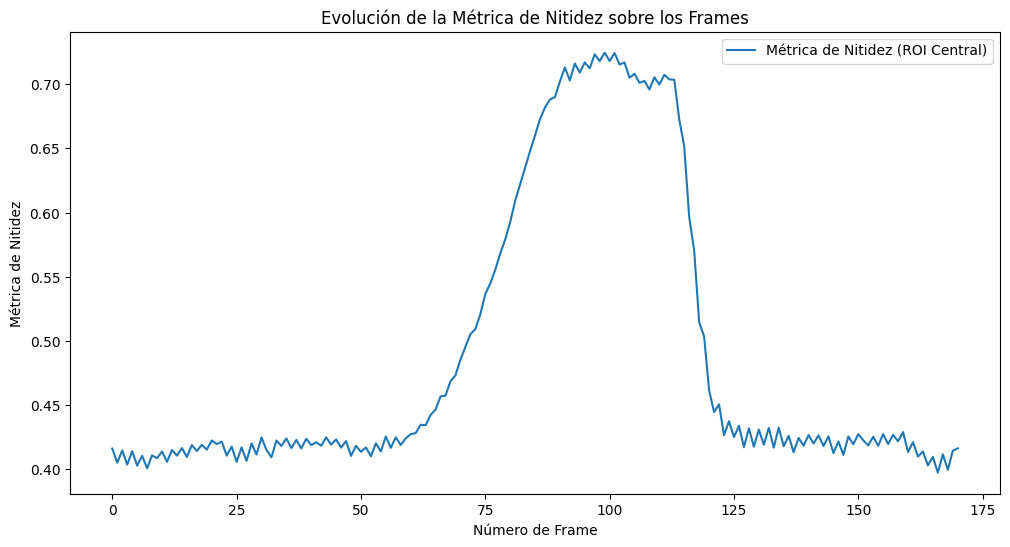

In [ ]:
plt.figure(figsize=(12, 6))

# Graficar la métrica de nitidez
plt.plot(sharpness_metrics, label='Métrica de Nitidez (ROI Central)')

# Añadir título y etiquetas
plt.title('Evolución de la Métrica de Nitidez sobre los Frames')
plt.xlabel('Número de Frame')
plt.ylabel('Métrica de Nitidez')

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [ ]:
# Encontrar el índice (frame) con la máxima métrica de nitidez
max_sharpness = max(sharpness_metrics)
max_sharpness_frame = sharpness_metrics.index(max_sharpness)

print(f"El frame con máximo enfoque es el número: {max_sharpness_frame}")


El frame con máximo enfoque es el número: 99


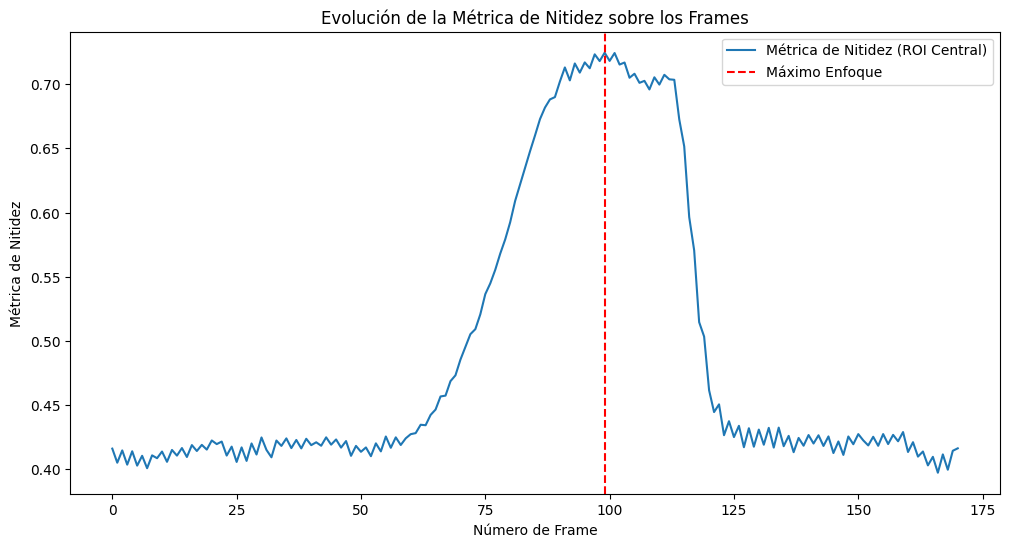

In [ ]:
# Añadir una línea vertical en el punto de máximo enfoque
plt.figure(figsize=(12, 6))
plt.plot(sharpness_metrics, label='Métrica de Nitidez (ROI Central)')
plt.axvline(x=max_sharpness_frame, color='r', linestyle='--', label='Máximo Enfoque')

# Añadir título y etiquetas
plt.title('Evolución de la Métrica de Nitidez sobre los Frames')
plt.xlabel('Número de Frame')
plt.ylabel('Métrica de Nitidez')

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


Ahora visualizaremos el video

In [ ]:
# Ruta del video de entrada
video_path = '/content/focus_video.mov'

# Crear un objeto VideoCapture
cap = cv2.VideoCapture(video_path)

# Verificar si el video se abrió correctamente
if not cap.isOpened():
    print("Error al abrir el archivo de video")

# Obtener propiedades del video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Definir el codec y crear el objeto VideoWriter
output_path = '/content/output_video_b.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))


In [ ]:
# Porcentaje del área total del frame que cubrirá la ROI (0.05 para 5% o 0.10 para 10%)
roi_area_percentage = 0.05

# Calcular el área total del frame
frame_area = width * height

# Calcular el área de la ROI
roi_area = frame_area * roi_area_percentage

# Mantener la proporción del frame (aspect ratio)
aspect_ratio = width / height

# Calcular el alto y el ancho de la ROI
roi_height = int(np.sqrt(roi_area / aspect_ratio))
roi_width = int(roi_height * aspect_ratio)

# Coordenadas superiores izquierdas de la ROI
x_start = (width - roi_width) // 2
y_start = (height - roi_height) // 2

# Coordenadas inferiores derechas de la ROI
x_end = x_start + roi_width
y_end = y_start + roi_height

print(f"Dimensiones de la ROI: Ancho={roi_width}, Alto={roi_height}")
print(f"Coordenadas de la ROI: x_start={x_start}, y_start={y_start}, x_end={x_end}, y_end={y_end}")


Dimensiones de la ROI: Ancho=142, Alto=80
Coordenadas de la ROI: x_start=249, y_start=140, x_end=391, y_end=220


In [ ]:
# Reiniciar el índice del frame
frame_number = 0

# Reiniciar el VideoCapture
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Determinar el color de la ROI
    if frame_number == max_sharpness_frame:
        color = (0, 255, 0)  # Verde para el frame con máximo enfoque
    else:
        color = (0, 0, 255)  # Rojo para los demás frames

    # Dibujar la ROI superpuesta en el frame
    cv2.rectangle(frame, (x_start, y_start), (x_end, y_end), color, 5)

    # Escribir el frame en el video de salida
    out.write(frame)

    frame_number += 1

    # Mostrar el progreso cada 10 frames
    if frame_number % 10 == 0:
        print(f"Escribiendo frame {frame_number}")

# Liberar los objetos
cap.release()
out.release()

print("Video de salida generado correctamente.")


Escribiendo frame 10
Escribiendo frame 20
Escribiendo frame 30
Escribiendo frame 40
Escribiendo frame 50
Escribiendo frame 60
Escribiendo frame 70
Escribiendo frame 80
Escribiendo frame 90
Escribiendo frame 100
Escribiendo frame 110
Escribiendo frame 120
Escribiendo frame 130
Escribiendo frame 140
Escribiendo frame 150
Escribiendo frame 160
Escribiendo frame 170
Video de salida generado correctamente.


In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width=600):
    video_file = open(video_path,'rb').read()
    video_url = f"data:video/avi;base64,{b64encode(video_file).decode()}"
    return HTML(f"""<video width={video_width} controls>
                        <source src="{video_url}" type="video/avi">
                    </video>""")

show_video(output_path)


En caso de que no se pueda ver, adjunto el video en un link de google drive:

https://drive.google.com/file/d/1u-BPFt0omhjL0U0oiy_qhGRGwncAkw3C/view?usp=sharing

En el experimento 1b, se realiza una medición de la nitidez sobre una Región de Interés (ROI) ubicada en el centro del frame, representando entre el 5% y el 10% del área total del frame. Se calcula el área de la ROI manteniendo la proporción del aspecto de la imagen. Posteriormente, se aplica la Transformada de Fourier 2D a los píxeles dentro de esta región para analizar las frecuencias altas, que son un indicador de nitidez. La métrica de nitidez se calcula como la suma de las magnitudes de las frecuencias altas dentro de la ROI, y se grafica la evolución de esta métrica a lo largo de los frames, mostrando que el frame de mayor enfoque es el número 99.

### c) Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores arbitrarios, probar con varios valores 3x3, 7x5, etc … (al menos 3).

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Lista de configuraciones de matrices NxM
grid_configs = [(3, 3), (5, 5), (7, 5)]


In [ ]:
# Ruta del video
video_path = '/content/focus_video.mov'

# Crear un objeto VideoCapture
cap = cv2.VideoCapture(video_path)

# Verificar si el video se abrió correctamente
if not cap.isOpened():
    print("Error al abrir el archivo de video")

# Obtener propiedades del video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)


In [ ]:
# Diccionario para almacenar las métricas de nitidez por configuración
sharpness_metrics_dict = {}
max_sharpness_frames = {}

for config in grid_configs:
    N, M = config
    print(f"\nProcesando configuración de matriz {N}x{M}")

    # Reiniciar el VideoCapture
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    # Inicializar la lista de métricas de nitidez para esta configuración
    sharpness_metrics = []

    # Calcular el tamaño de cada ROI
    roi_width = width // N
    roi_height = height // M

    frame_number = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Salir del bucle si no hay más frames

        # Convertir el frame a escala de grises
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Inicializar una lista para almacenar las métricas de cada ROI en este frame
        roi_metrics = []

        # Iterar sobre cada ROI en la matriz
        for i in range(N):
            for j in range(M):
                # Coordenadas de la ROI
                x_start = i * roi_width
                y_start = j * roi_height
                x_end = x_start + roi_width
                y_end = y_start + roi_height

                # Asegurarse de no exceder los límites del frame
                x_end = min(x_end, width)
                y_end = min(y_end, height)

                # Extraer la ROI
                roi = gray[y_start:y_end, x_start:x_end]

                # Aplicar la Transformada de Fourier 2D a la ROI
                f = np.fft.fft2(roi)
                fshift = np.fft.fftshift(f)
                magnitude_spectrum = np.abs(fshift)

                # Crear una máscara para las frecuencias altas
                rows, cols = roi.shape
                crow, ccol = rows // 2 , cols // 2  # Coordenadas del centro de la ROI
                radius = 10  # Ajusta este valor según tus necesidades

                mask = np.ones((rows, cols), np.uint8)
                cv2.circle(mask, (ccol, crow), radius, 0, thickness=-1)

                # Aplicar la máscara al espectro de magnitud
                high_freq_mag = magnitude_spectrum * mask

                # Calcular la métrica de nitidez como la suma de las magnitudes de las frecuencias altas
                sharpness = np.sum(high_freq_mag)

                # Normalizar por la energía total
                total_energy = np.sum(magnitude_spectrum)
                sharpness_metric = sharpness / total_energy

                # Almacenar la métrica de la ROI
                roi_metrics.append(sharpness_metric)

        # Calcular la métrica total para el frame (puede ser el promedio o la suma)
        frame_sharpness = np.mean(roi_metrics)  # Puedes probar con np.sum(roi_metrics)
        sharpness_metrics.append(frame_sharpness)

        frame_number += 1

        # Mostrar el progreso cada 10 frames
        if frame_number % 10 == 0:
            print(f"Procesando frame {frame_number}/{total_frames}")

    # Almacenar las métricas de nitidez para esta configuración
    sharpness_metrics_dict[config] = sharpness_metrics

    # Identificar el frame con máximo enfoque
    max_sharpness = max(sharpness_metrics)
    max_sharpness_frame = sharpness_metrics.index(max_sharpness)
    max_sharpness_frames[config] = max_sharpness_frame

    print(f"El frame con máximo enfoque para la configuración {N}x{M} es el número: {max_sharpness_frame}")



Procesando configuración de matriz 3x3
Procesando frame 10/171
Procesando frame 20/171
Procesando frame 30/171
Procesando frame 40/171
Procesando frame 50/171
Procesando frame 60/171
Procesando frame 70/171
Procesando frame 80/171
Procesando frame 90/171
Procesando frame 100/171
Procesando frame 110/171
Procesando frame 120/171
Procesando frame 130/171
Procesando frame 140/171
Procesando frame 150/171
Procesando frame 160/171
Procesando frame 170/171
El frame con máximo enfoque para la configuración 3x3 es el número: 91

Procesando configuración de matriz 5x5
Procesando frame 10/171
Procesando frame 20/171
Procesando frame 30/171
Procesando frame 40/171
Procesando frame 50/171
Procesando frame 60/171
Procesando frame 70/171
Procesando frame 80/171
Procesando frame 90/171
Procesando frame 100/171
Procesando frame 110/171
Procesando frame 120/171
Procesando frame 130/171
Procesando frame 140/171
Procesando frame 150/171
Procesando frame 160/171
Procesando frame 170/171
El frame con máxi

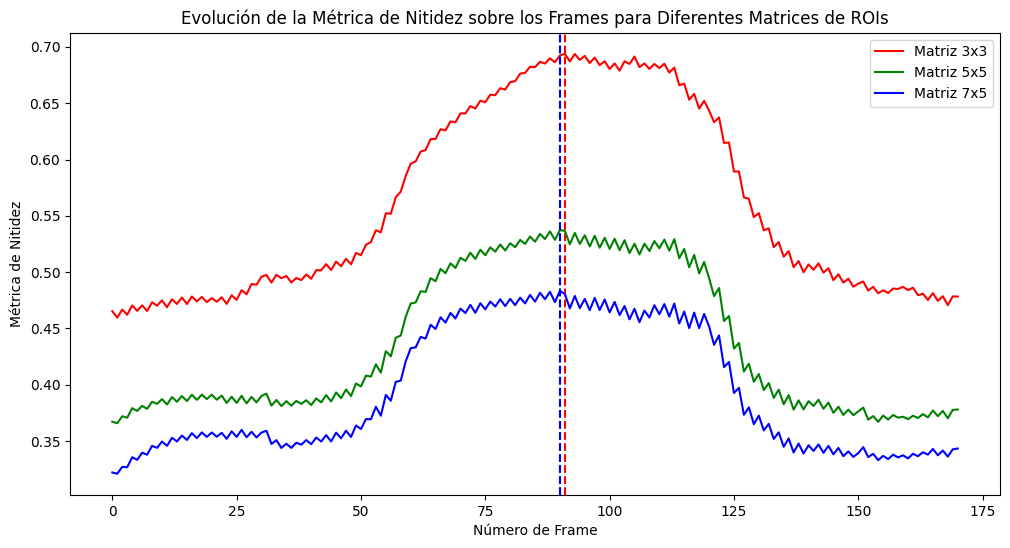

In [ ]:
plt.figure(figsize=(12, 6))

# Colores para las diferentes configuraciones
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Iterar sobre cada configuración y graficar la métrica
for idx, config in enumerate(grid_configs):
    N, M = config
    sharpness_metrics = sharpness_metrics_dict[config]
    plt.plot(sharpness_metrics, color=colors[idx % len(colors)], label=f'Matriz {N}x{M}')

    # Marcar el punto de máximo enfoque
    max_frame = max_sharpness_frames[config]
    plt.axvline(x=max_frame, color=colors[idx % len(colors)], linestyle='--')

# Añadir título y etiquetas
plt.title('Evolución de la Métrica de Nitidez sobre los Frames para Diferentes Matrices de ROIs')
plt.xlabel('Número de Frame')
plt.ylabel('Métrica de Nitidez')

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


Ahora vamos a generar el video

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from base64 import b64encode

# Ruta del video de entrada
video_path = '/content/focus_video.mov'

# Crear un objeto VideoCapture
cap = cv2.VideoCapture(video_path)

# Verificar si el video se abrió correctamente
if not cap.isOpened():
    print("Error al abrir el archivo de video")

# Obtener propiedades del video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Lista de configuraciones de matrices NxM
grid_configs = [(3, 3), (5, 5), (7, 5)]


# Diccionario para almacenar las métricas de nitidez por configuración
sharpness_metrics_dict = {}
max_sharpness_frames = {}

for config in grid_configs:
    N, M = config
    print(f"\nProcesando configuración de matriz {N}x{M}")

    # Reiniciar el VideoCapture
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    # Inicializar la lista de métricas de nitidez para esta configuración
    sharpness_metrics = []

    # Calcular el tamaño de cada ROI
    roi_width = width // N
    roi_height = height // M

    frame_number = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convertir el frame a escala de grises
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Inicializar una lista para almacenar las métricas de cada ROI en este frame
        roi_metrics = []

        # Iterar sobre cada ROI en la matriz
        for i in range(N):
            for j in range(M):
                # Coordenadas de la ROI
                x_start = i * roi_width
                y_start = j * roi_height
                x_end = x_start + roi_width
                y_end = y_start + roi_height

                # Asegurarse de no exceder los límites del frame
                x_end = min(x_end, width)
                y_end = min(y_end, height)

                # Extraer la ROI
                roi = gray[y_start:y_end, x_start:x_end]

                # Aplicar la Transformada de Fourier 2D a la ROI
                f = np.fft.fft2(roi)
                fshift = np.fft.fftshift(f)
                magnitude_spectrum = np.abs(fshift)

                # Crear una máscara para las frecuencias altas
                rows, cols = roi.shape
                crow, ccol = rows // 2 , cols // 2  # Coordenadas del centro de la ROI
                radius = 10  # Ajusta este valor según tus necesidades

                mask = np.ones((rows, cols), np.uint8)
                cv2.circle(mask, (ccol, crow), radius, 0, thickness=-1)

                # Aplicar la máscara al espectro de magnitud
                high_freq_mag = magnitude_spectrum * mask

                # Calcular la métrica de nitidez como la suma de las magnitudes de las frecuencias altas
                sharpness = np.sum(high_freq_mag)

                # Normalizar por la energía total
                total_energy = np.sum(magnitude_spectrum)
                sharpness_metric = sharpness / total_energy

                # Almacenar la métrica de la ROI
                roi_metrics.append(sharpness_metric)

        # Calcular la métrica total para el frame (puede ser el promedio o la suma)
        frame_sharpness = np.mean(roi_metrics)
        sharpness_metrics.append(frame_sharpness)

        frame_number += 1

        # Mostrar el progreso cada 10 frames
        if frame_number % 10 == 0:
            print(f"Procesando frame {frame_number}/{total_frames}")

    # Almacenar las métricas de nitidez para esta configuración
    sharpness_metrics_dict[config] = sharpness_metrics

    # Identificar el frame con máximo enfoque
    max_sharpness = max(sharpness_metrics)
    max_sharpness_frame = sharpness_metrics.index(max_sharpness)
    max_sharpness_frames[config] = max_sharpness_frame

    print(f"El frame con máximo enfoque para la configuración {N}x{M} es el número: {max_sharpness_frame}")

# Generar los videos para cada configuración
for config in grid_configs:
    N, M = config
    print(f"\nGenerando video para la configuración de matriz {N}x{M}")

    # Reiniciar el VideoCapture
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    # Definir el codec y crear el objeto VideoWriter para MP4
    output_path = f'/content/output_video_c_{N}x{M}.mp4'
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Obtener el frame de máximo enfoque para esta configuración
    max_sharpness_frame = max_sharpness_frames[config]

    # Calcular el tamaño de cada ROI
    roi_width = width // N
    roi_height = height // M

    frame_number = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Determinar el color de las ROIs
        if frame_number == max_sharpness_frame:
            color = (0, 255, 0)
        else:
            color = (0, 0, 255)

        # Dibujar la matriz de ROIs en el frame
        for i in range(N):
            for j in range(M):
                # Coordenadas de la ROI
                x_start = i * roi_width
                y_start = j * roi_height
                x_end = x_start + roi_width
                y_end = y_start + roi_height

                # Asegurarse de no exceder los límites del frame
                x_end = min(x_end, width)
                y_end = min(y_end, height)

                # Dibujar el rectángulo de la ROI
                cv2.rectangle(frame, (x_start, y_start), (x_end, y_end), color, 1)

        # Escribir el frame en el video de salida
        out.write(frame)

        frame_number += 1

        # Mostrar el progreso cada 10 frames
        if frame_number % 10 == 0:
            print(f"Escribiendo frame {frame_number}/{total_frames}")

    # Liberar los objetos
    cap.release()
    out.release()
    print(f"Video generado: {output_path}")

    # Mostrar el video generado en Colab
    def show_video(video_path, video_width=600):
        ext = video_path.split('.')[-1]
        mime_type = 'video/mp4' if ext == 'mp4' else 'video/avi'
        video_file = open(video_path,'rb').read()
        video_url = f"data:{mime_type};base64,{b64encode(video_file).decode()}"
        return HTML(f"""<video width={video_width} controls>
                            <source src="{video_url}" type="{mime_type}">
                        </video>""")

    print(f"\nVideo para la configuración {N}x{M}:")
    display(show_video(output_path))



Procesando configuración de matriz 3x3
Procesando frame 10/171
Procesando frame 20/171
Procesando frame 30/171
Procesando frame 40/171
Procesando frame 50/171
Procesando frame 60/171
Procesando frame 70/171
Procesando frame 80/171
Procesando frame 90/171
Procesando frame 100/171
Procesando frame 110/171
Procesando frame 120/171
Procesando frame 130/171
Procesando frame 140/171
Procesando frame 150/171
Procesando frame 160/171
Procesando frame 170/171
El frame con máximo enfoque para la configuración 3x3 es el número: 91

Procesando configuración de matriz 5x5
Procesando frame 10/171
Procesando frame 20/171
Procesando frame 30/171
Procesando frame 40/171
Procesando frame 50/171
Procesando frame 60/171
Procesando frame 70/171
Procesando frame 80/171
Procesando frame 90/171
Procesando frame 100/171
Procesando frame 110/171
Procesando frame 120/171
Procesando frame 130/171
Procesando frame 140/171
Procesando frame 150/171
Procesando frame 160/171
Procesando frame 170/171
El frame con máxi


Generando video para la configuración de matriz 5x5
Escribiendo frame 10/171
Escribiendo frame 20/171
Escribiendo frame 30/171
Escribiendo frame 40/171
Escribiendo frame 50/171
Escribiendo frame 60/171
Escribiendo frame 70/171
Escribiendo frame 80/171
Escribiendo frame 90/171
Escribiendo frame 100/171
Escribiendo frame 110/171
Escribiendo frame 120/171
Escribiendo frame 130/171
Escribiendo frame 140/171
Escribiendo frame 150/171
Escribiendo frame 160/171
Escribiendo frame 170/171
Video generado: /content/output_video_c_5x5.mp4

Video para la configuración 5x5:



Generando video para la configuración de matriz 7x5
Escribiendo frame 10/171
Escribiendo frame 20/171
Escribiendo frame 30/171
Escribiendo frame 40/171
Escribiendo frame 50/171
Escribiendo frame 60/171
Escribiendo frame 70/171
Escribiendo frame 80/171
Escribiendo frame 90/171
Escribiendo frame 100/171
Escribiendo frame 110/171
Escribiendo frame 120/171
Escribiendo frame 130/171
Escribiendo frame 140/171
Escribiendo frame 150/171
Escribiendo frame 160/171
Escribiendo frame 170/171
Video generado: /content/output_video_c_7x5.mp4

Video para la configuración 7x5:


Si no se pueden ver los videos, aqui los link para verlos en google drive:

3x3

https://drive.google.com/file/d/16gH2u6fyDzZ_cWqrYEqZSYBWOadvOZi-/view?usp=sharing

5x5

https://drive.google.com/file/d/1Tx7kN22mMzb8Ov3aJCweppjINwNd750r/view?usp=sharing


7x5

https://drive.google.com/file/d/16HVq63mPWv7CT-8WCT5weIx-dMwQ4NRS/view?usp=sharing

### 2. Cambiar la métrica de enfoque eligiendo uno de los algoritmos explicados en el apéndice de: Analysis of focus measure operators in shapefrom focus.

- El algoritmo de detección a implementar debe detectar y devolver los puntos de máximo enfoque de manera  automática.

En este caso, me enfocare en el uso del algoritmo "Laplacian-based operator, LAPn" de los apendices de la lectura. Realizare el analisis para una medición de todo el frame, presentando las curvas y el video.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Ruta del video
video_path = '/content/focus_video.mov'

# Crear un objeto VideoCapture
cap = cv2.VideoCapture(video_path)

# Verificar si el video se abrió correctamente
if not cap.isOpened():
    print("Error al abrir el archivo de video")


In [ ]:
# Lista para almacenar la métrica de enfoque de cada frame
focus_metrics = []

# Obtener el número total de frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))


In [ ]:
frame_number = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convertir el frame a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Aplicar el operador Laplaciano
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)

    # Calcular la métrica de enfoque como la varianza del Laplaciano
    focus_measure = cv2.mean(np.abs(laplacian))[0]

    # Almacenar la métrica de enfoque
    focus_metrics.append(focus_measure)

    frame_number += 1

    # Mostrar el progreso cada 10 frames
    if frame_number % 10 == 0:
        print(f"Procesando frame {frame_number}/{total_frames}")

# Liberar el objeto VideoCapture
cap.release()


Procesando frame 10/171
Procesando frame 20/171
Procesando frame 30/171
Procesando frame 40/171
Procesando frame 50/171
Procesando frame 60/171
Procesando frame 70/171
Procesando frame 80/171
Procesando frame 90/171
Procesando frame 100/171
Procesando frame 110/171
Procesando frame 120/171
Procesando frame 130/171
Procesando frame 140/171
Procesando frame 150/171
Procesando frame 160/171
Procesando frame 170/171


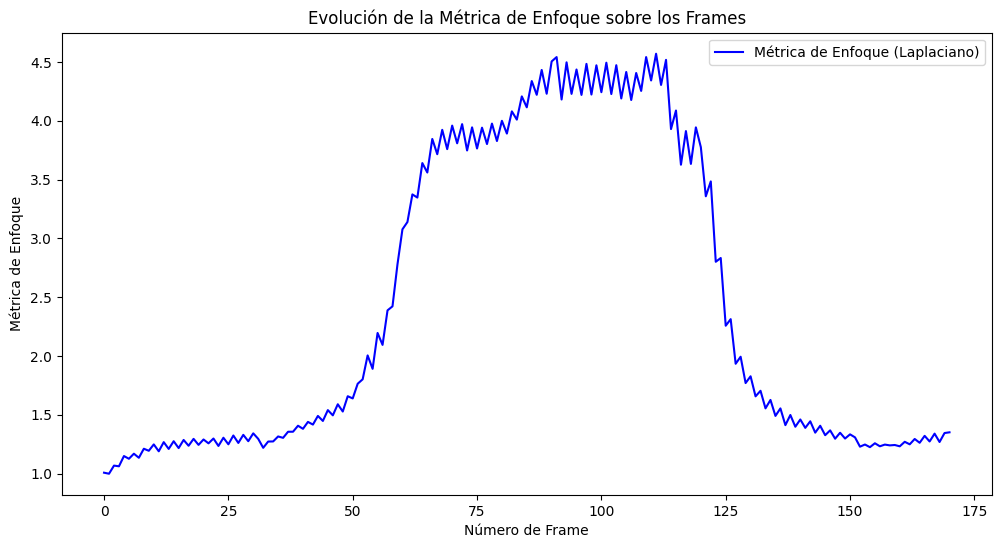

In [ ]:
# Crear una figura
plt.figure(figsize=(12, 6))

# Graficar la métrica de enfoque
plt.plot(focus_metrics, label='Métrica de Enfoque (Laplaciano)', color='blue')

# Añadir título y etiquetas
plt.title('Evolución de la Métrica de Enfoque sobre los Frames')
plt.xlabel('Número de Frame')
plt.ylabel('Métrica de Enfoque')

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [ ]:
# Encontrar el índice (frame) con la máxima métrica de enfoque
max_focus = max(focus_metrics)
max_focus_frame = focus_metrics.index(max_focus)

print(f"El frame con máximo enfoque es el número: {max_focus_frame}")


El frame con máximo enfoque es el número: 111


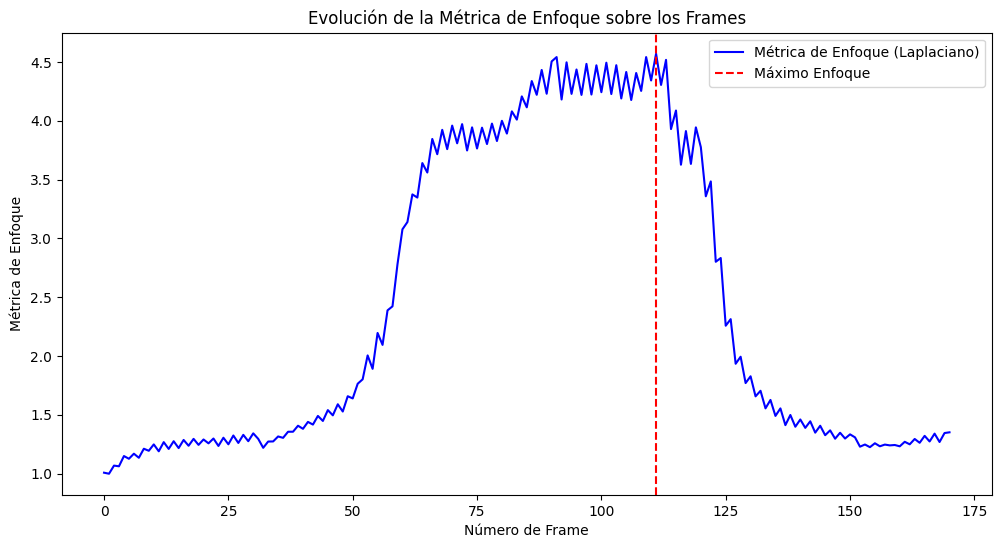

In [ ]:
# Añadir una línea vertical en el punto de máximo enfoque
plt.figure(figsize=(12, 6))
plt.plot(focus_metrics, label='Métrica de Enfoque (Laplaciano)', color='blue')
plt.axvline(x=max_focus_frame, color='red', linestyle='--', label='Máximo Enfoque')

# Añadir título y etiquetas
plt.title('Evolución de la Métrica de Enfoque sobre los Frames')
plt.xlabel('Número de Frame')
plt.ylabel('Métrica de Enfoque')

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


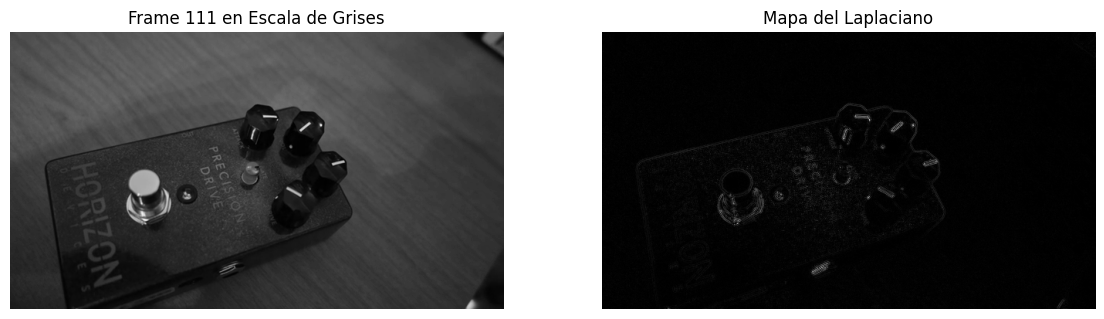

In [ ]:
# Ruta del video
video_path = '/content/focus_video.mov'

# Crear un objeto VideoCapture
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, max_focus_frame)

ret, frame = cap.read()
cap.release()

if ret:
    # Convertir el frame a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Aplicar el operador Laplaciano
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)

    # Mostrar el frame y su Laplaciano
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title(f'Frame {max_focus_frame} en Escala de Grises')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(np.abs(laplacian), cmap='gray')
    plt.title('Mapa del Laplaciano')
    plt.axis('off')

    plt.show()


Se obtiene el mismo frame que al usar el analisis espectral (frame 111)

In [ ]:
import cv2
import numpy as np

# Ruta del video de entrada
video_path = '/content/focus_video.mov'

# Crear un objeto VideoCapture
cap = cv2.VideoCapture(video_path)

# Verificar si el video se abrió correctamente
if not cap.isOpened():
    print("Error al abrir el archivo de video")

# Obtener propiedades del video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Definir el codec y crear el objeto VideoWriter para MP4
output_path = '/content/output_video_focus.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec para MP4
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Reiniciar el contador de frames
frame_number = 0


In [ ]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Salir del bucle si no hay más frames

    # Determinar el color del borde
    if frame_number == max_focus_frame:
        color = (0, 255, 0)  # Verde para el frame con máximo enfoque
    else:
        color = (0, 0, 255)  # Rojo para los demás frames

    # Dibujar el borde alrededor del frame
    grosor_borde = 5  # Puedes ajustar este valor según tus preferencias
    cv2.rectangle(frame, (0, 0), (width - 1, height - 1), color, grosor_borde)

    # Escribir el frame en el video de salida
    out.write(frame)

    frame_number += 1

    # Mostrar el progreso cada 10 frames
    if frame_number % 10 == 0:
        print(f"Procesando frame {frame_number}/{total_frames}")

# Liberar los recursos
cap.release()
out.release()

print(f"Video de salida guardado en {output_path}")


Procesando frame 10/171
Procesando frame 20/171
Procesando frame 30/171
Procesando frame 40/171
Procesando frame 50/171
Procesando frame 60/171
Procesando frame 70/171
Procesando frame 80/171
Procesando frame 90/171
Procesando frame 100/171
Procesando frame 110/171
Procesando frame 120/171
Procesando frame 130/171
Procesando frame 140/171
Procesando frame 150/171
Procesando frame 160/171
Procesando frame 170/171
Video de salida guardado en /content/output_video_focus.mp4


In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width=600):
    video_file = open(video_path,'rb').read()
    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
    return HTML(f"""
        <video width="{video_width}" controls>
            <source src="{video_url}" type="video/mp4">
        </video>
    """)

show_video(output_path)


Aqui esta el link de google drive en caso que no se pueda visualizar

https://drive.google.com/file/d/1rjugiJLgXXGGIaU_C0l1QMHEmS7NlJPV/view?usp=drive_link